<a href="https://colab.research.google.com/github/andreRibeiro1989/medium/blob/main/tensorflowjs/digit_recognition/tensorflow_js_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# import digit dataset
mnist = tf.keras.datasets.mnist
(tx, ty), (vx, vy) = mnist.load_data()

# preprocess input types
tx = tx[:,:,:,None].astype('float32')
vx = vx[:,:,:,None].astype('float32')
ty = ty.astype(int)
vy = vy.astype(int)

# display relevant info
print("""tx:%s, ty:%s
vx:%s, vy:%s""" % (tx.shape, ty.shape, vx.shape, vy.shape))

11493376/11490434 [==============================] - 0s 0us/step
tx:(60000, 28, 28, 1), ty:(60000,)
vx:(10000, 28, 28, 1), vy:(10000,)


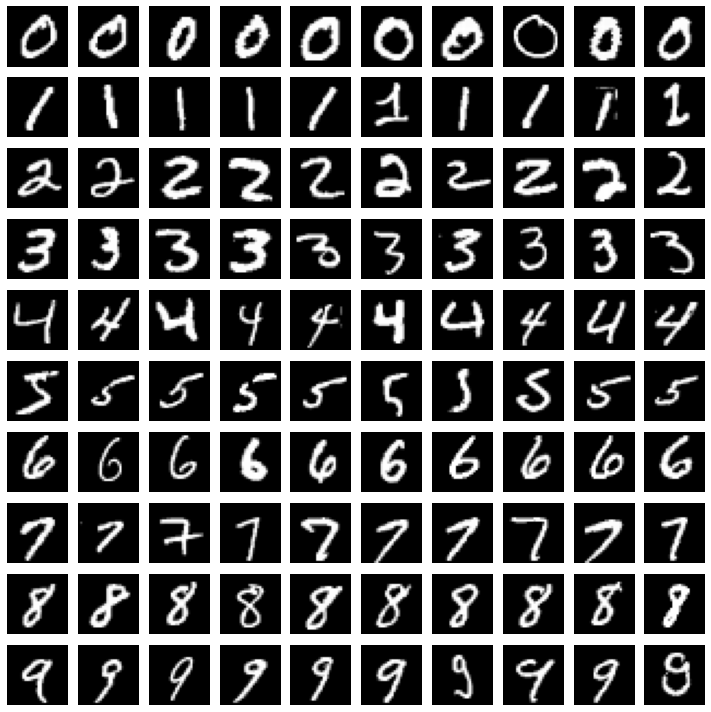

In [2]:
import matplotlib.pyplot as plt

# create a grid of plots
f, axs = plt.subplots(10,10,figsize=(10,10))

# plot a sample number into each subplot
for i in range(10):
  for j in range(10):
    # get a sample image for the 'i' number
    img = tx[ty==i,:,:,0][j,:,:]

    # plot image in axes
    axs[i,j].imshow(img, cmap='gray')

    # remove x and y axis
    axs[i,j].axis('off')

# remove unecessary white space
plt.tight_layout()

# display image
plt.show()

In [3]:
# defines a standard 2d convolution block with batch normalisation, 
# relu activation, max pooling and dropout

def normConvBlock(filters, return_model=True, name=None):
  lays = [
    tf.keras.layers.Conv2D(filters, 3, padding='valid', name=name+'_conv'),
    tf.keras.layers.BatchNormalization(name=name+'_bn'),
    tf.keras.layers.Activation('relu', name=name+'_act'),
    tf.keras.layers.MaxPooling2D(2, strides=2, name=name+'_mpool'),
    tf.keras.layers.Dropout(0.1, name=name+'_drop'),
  ]

  if return_model:
    return tf.keras.models.Sequential(lays, name=name)
  else:
    return lays

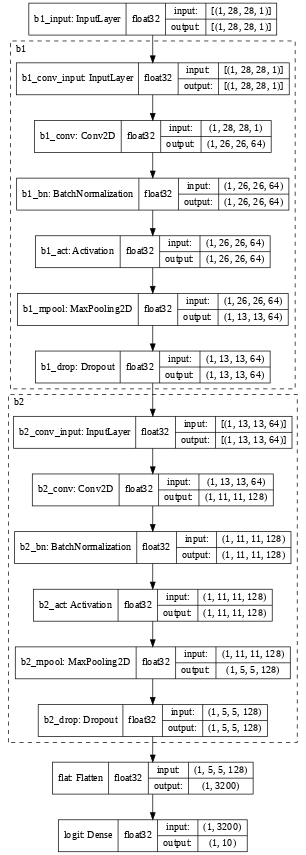

In [4]:
# create NN model
model = tf.keras.models.Sequential()
model.add(normConvBlock(64, name='b1'))
model.add(normConvBlock(128, name='b2'))
model.add(tf.keras.layers.Flatten(name='flat'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='logit'))

# compile model with adam optimizer and crossentropy loss
# note that 'sparse_categorical_crossentropy' loss should be used as our target
# is encoded as ordinal. if using one hot change this to 'categorical_crossentropy'
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

# test model with a sample image
_ = model(tx[:1,:,:,:])

# summary of model structure
tf.keras.utils.plot_model(
    model, 
    show_shapes=True, 
    show_layer_names=True, 
    show_dtype=True,
    expand_nested=True,
    dpi = 50
)

In [5]:
# define an early stopping callback. This callback will load the iteration with
# the best val loss at the end of training
es_call = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

# fit the model with the mnist dataset
history = model.fit(tx, ty, validation_data=(vx, vy), epochs=20, batch_size=1024, callbacks=[es_call])

Epoch 1/20
59/59 [==============================] - 6s 59ms/step - loss: 0.4417 - acc: 0.8636 - val_loss: 0.3516 - val_acc: 0.9021
Epoch 2/20
59/59 [==============================] - 3s 50ms/step - loss: 0.1156 - acc: 0.9663 - val_loss: 0.0986 - val_acc: 0.9691
Epoch 3/20
59/59 [==============================] - 3s 50ms/step - loss: 0.0808 - acc: 0.9759 - val_loss: 0.0576 - val_acc: 0.9825
Epoch 4/20
59/59 [==============================] - 3s 50ms/step - loss: 0.0656 - acc: 0.9807 - val_loss: 0.0477 - val_acc: 0.9848
Epoch 5/20
59/59 [==============================] - 3s 50ms/step - loss: 0.0550 - acc: 0.9839 - val_loss: 0.0413 - val_acc: 0.9865
Epoch 6/20
59/59 [==============================] - 3s 50ms/step - loss: 0.0471 - acc: 0.9859 - val_loss: 0.0415 - val_acc: 0.9868
Epoch 7/20
59/59 [==============================] - 3s 50ms/step - loss: 0.0420 - acc: 0.9875 - val_loss: 0.0373 - val_acc: 0.9872
Epoch 8/20
59/59 [==============================] - 3s 50ms/step - loss: 0.0379 - a

In [6]:
# install / update the tensorflowjs package
!pip install tensorflowjs > /dev/null 2>&1

import tensorflowjs
print(tensorflowjs.__version__)

# convert keras model to tensorflow js
tensorflowjs.converters.save_keras_model(model, './mnist_tf_keras_js_model/')

3.8.0


In [7]:
# download generated files from colab to local

from google.colab import files

files.download("mnist_tf_keras_js_model/group1-shard1of1.bin")
files.download("mnist_tf_keras_js_model/model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>